**Time Series Analysis:**

1. Analyze the trend of deal creation over time and its correlation with calls.
2. Study the distribution of deal closure times and the duration of the period from creation to closure.
**Campaign Performance Analysis:**

1. Compare the performance of different campaigns in terms of lead generation and conversion rate.
2. Evaluate the effectiveness of various marketing sources (Source) in generating high-quality leads.
**Sales Department Performance Analysis:**

1. Assess the performance of individual deal owners and advertising campaigns in terms of the number of processed deals, conversion rate, and total sales amount.
**Payment and Product Analysis:**

1. Study the distribution of payment types and their impact on deal success.
2. Analyze the popularity and success of different products and types of training.
**Geographical Analysis:**

1. Analyze the geographical distribution of deals by cities.
2. Study the impact of geographical factors on deal success and trends.

Importing necessary libraries

In [148]:
# Importing Libraries
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import pickle
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Loading and displaying data

In [149]:
with open('/content/Tables.pkl', 'rb') as f:
    # Loading data from the pickle file
    data_frames = pickle.load(f)

# Extracting individual DataFrames from the dictionary
deals = data_frames['deals']
calls = data_frames['calls']
contacts = data_frames['contacts']
spend = data_frames['spend']

print('Data successfully loaded')

Data successfully loaded


In [150]:
deals.head(5)

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Created Time Only
0,5805028000056864695,Ben Hall,NaT,NaN,New Lead,unknown,/eng/test,03.07.23women,NaN,v16,...,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849495,unknown,unknown,2024-06-21,15:30:00
1,5805028000056859489,Ulysses Adams,NaT,NaN,New Lead,unknown,/at-eng,unknown,NaN,NaN,...,2024-06-21 15:23:00,6.0,NaN,0.0,2000.0,5805028000056834471,unknown,unknown,2024-06-21,15:23:00
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,0:26:43,b1-at,...,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854421,unknown,unknown,2024-06-21,14:45:00
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,1:00:04,bloggersvideo14com,...,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056889351,unknown,unknown,2024-06-21,13:32:00
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,0:53:12,website,...,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876176,unknown,unknown,2024-06-21,13:21:00


In [151]:
calls.head(5)

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
0,5805028000000805001,2023-06-30 08:43:00,John Doe,NaN,Inbound,171.0,Received,NaN,NaN
1,5805028000000768006,2023-06-30 08:46:00,John Doe,NaN,Outbound,28.0,Attended Dialled,Completed,False
2,5805028000000764027,2023-06-30 08:59:00,John Doe,NaN,Outbound,24.0,Attended Dialled,Completed,False
3,5805028000000787003,2023-06-30 09:20:00,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,Completed,False
4,5805028000000768019,2023-06-30 09:30:00,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,Completed,False


In [152]:
contacts.head(5)

,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00
1,5805028000000872003,Charlie Davis,2023-07-03 11:31:00,2024-05-21 10:23:00
2,5805028000000889001,Bob Brown,2023-07-02 22:37:00,2023-12-21 13:17:00
3,5805028000000907006,Bob Brown,2023-07-03 05:44:00,2023-12-29 15:20:00
4,5805028000000939010,Nina Scott,2023-07-04 10:11:00,2024-04-16 16:14:00


In [153]:
spend.head(5)

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00,0,NaN,NaN
3,2023-07-03,Google Ads,NaN,0,0.00,0,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00,0,NaN,NaN


# **1. Time Series Analysis**

The first step is to identify the analysis period and its duration.

In [154]:
# Analysis Period
start_date = deals['Created Date'].min()  # Get the earliest date
end_date = deals['Created Date'].max()    # Get the latest date
duration = (end_date - start_date).days   # Calculate the number of days

# Creating a table with the analysis period
analysis_period = pd.DataFrame({
    'Parameter': ['Start Date', 'End Date', 'Duration (days)'],
    'Value': [start_date, end_date, duration]  # Using start_date and end_date without .date()
})

# Replace NaN and any remaining non-numeric values with dashes (if necessary)
analysis_period = analysis_period.fillna('-')

# Creating a table chart
fig = ff.create_table(analysis_period)

# Configuring the chart's appearance
fig.update_layout(title='Analysis Period')

# Display the chart
fig.show()

Now it is necessary to provide overall statistics for the school, i.e., to indicate the fields of study, forms of education, duration of study, number of students, and payment

In [155]:
# Filtering data to include only rows where 'Initial Amount Paid' is greater than 0
filtered_deals = deals[deals['Initial Amount Paid'] > 0]

# Grouping data by subject and type of education and calculating the required metrics
summary = filtered_deals.groupby(['Product', 'Education Type'], observed=True).agg(
    students_count=('Id', 'count'),  # Total number of students in each education type
    initial_amount=('Initial Amount Paid', 'sum'),  # Total amount of initial payments
    total_amount=('Offer Total Amount', 'sum')  # Total payment amount
).reset_index()

# Renaming columns for convenience
summary.columns = [
    'Subjects',
    'Education Type',
    'Number of Students',
    'Total Initial Payments',
    'Total Payment Amount'
]

# Pivoting the summary table to display education types separately
summary_pivot = summary.pivot(index='Subjects', columns='Education Type', values=['Number of Students', 'Total Initial Payments', 'Total Payment Amount'])

# Adjusting the MultiIndex structure for better display
summary_pivot.columns = [f"{metric} {edu_type} Type" for metric, edu_type in summary_pivot.columns]
summary_pivot = summary_pivot.reset_index()

# Adding a row with totals for each numeric column
total_row = summary_pivot.select_dtypes(include='number').sum()  # Summing only numeric columns
total_row['Subjects'] = 'Total'  # Adding a label for the totals row

# Combining the table with the totals row
summary_pivot = pd.concat([summary_pivot, pd.DataFrame(total_row).T], ignore_index=True)

# Filling NaN values with dashes for better readability
summary_pivot = summary_pivot.fillna('-')

# Using <br> for line breaks in headers
summary_pivot.columns = [
    col.replace(' ', '<br>') for col in summary_pivot.columns
]

# Creating a table chart
fig = ff.create_table(summary_pivot)

# Configuring the chart's appearance
fig.update_layout(
    title_x=0.5,
    height=600  # Increasing table height for better visualization
)

# Display the chart
fig.show()

<ipython-input-155-9a52695cbd56>:35: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [156]:
# Filtering data to include only rows where 'Initial Amount Paid' is greater than 0
filtered_deals = deals[deals['Initial Amount Paid'] > 0]

# Grouping data by subject and type of education and calculating the required metrics
summary = filtered_deals.groupby(['Product', 'Education Type'], observed=True).agg(
    # Average course duration by education type
    avg_duration=('Course duration', 'mean'),

    # Average initial payment by education type
    avg_initial_amount=('Initial Amount Paid', lambda x: round(x.mean(), 2)),  # Average initial payment, rounded to 2 decimals

    # Maximum course cost by education type
    max_initial_amount=('Initial Amount Paid', 'max'),

    # Minimum course cost by education type
    min_initial_amount=('Initial Amount Paid', 'min')
).reset_index()

# Renaming columns for convenience
summary.columns = [
    'Subjects',
    'Education Type',
    'Average Course Duration (months)',
    'Average Initial Payment',
    'Maximum Course Cost',
    'Minimum Course Cost'
]

# Pivoting the summary table to display education types separately
summary_pivot = summary.pivot(index='Subjects', columns='Education Type', values=[
    'Average Course Duration (months)',
    'Average Initial Payment',
    'Maximum Course Cost',
    'Minimum Course Cost'
])

# Adjusting the MultiIndex structure for better display
summary_pivot.columns = [f"{metric} {edu_type} Type" for metric, edu_type in summary_pivot.columns]
summary_pivot = summary_pivot.reset_index()

# Rounding numeric values to the required precision
summary_pivot = summary_pivot.round({
    'Average Course Duration (months) Daytime Type': 1,  # Rounding to 1 decimal for duration
    'Average Course Duration (months) Evening Type': 1,
    'Average Initial Payment Daytime Type': 2,  # Rounding to 2 decimals for payments
    'Average Initial Payment Evening Type': 2,
    'Maximum Course Cost Daytime Type': 2,
    'Maximum Course Cost Evening Type': 2,
    'Minimum Course Cost Daytime Type': 2,
    'Minimum Course Cost Evening Type': 2
})

# Filling NaN values with dashes for better readability
summary_pivot = summary_pivot.fillna('-')

# Using <br> for line breaks in headers
summary_pivot.columns = [
    col.replace(' ', '<br>') for col in summary_pivot.columns
]

# Creating a table chart
fig = ff.create_table(summary_pivot)

# Configuring the chart's appearance
fig.update_layout(
    title_x=0.5,
    height=800  # Increasing table height for better visualization
)

# Display the chart
fig.show()

The next step will analyze the distribution of deal creation over the analysis period.

In [157]:
# Setting 'Created Time' as the index while retaining the column
deals.set_index('Created Time', drop=False, inplace=True)

# Grouping by months and counting the number of deals
deals_per_month = deals.resample('M').size().reset_index(name='Count')

# Creating a line chart using Plotly
fig = px.line(deals_per_month,
              x='Created Time',
              y='Count',
              title='Number of Deals Created by Month',
              markers=True)

# Configuring the axes
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Deals',
    xaxis=dict(tickangle=45),
    xaxis_tickformat='%Y-%m',  # Formatting the X-axis labels
)

# Adding hover labels
fig.update_traces(mode='lines+markers', hovertemplate='Number of Deals: %{y}<extra></extra>')

# Configuring the X-axis to display all months
fig.update_xaxes(
    tickvals=deals_per_month['Created Time'],  # Specifying all months
    ticktext=[date.strftime('%Y-%m') for date in deals_per_month['Created Time']]  # Formatting the labels
)

# Displaying the chart
fig.show()

<ipython-input-157-accc1b108c1f>:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



From the chart, we can observe that the number of deals created generally increased throughout the period. However, in the last two months of the analysis, the number of deals decreased. At this stage, it's difficult to hypothesize a reason, as the data does not cover at least a full year or more, which would be necessary for making any assumptions.

In [158]:
# Transforming timestamps for weekly aggregation
deals['Week'] = deals['Created Time'].dt.to_period('W').dt.start_time
deals_weekly = deals.groupby('Week').size().reset_index(name='Deals')

calls['Week'] = calls['Call Start Time'].dt.to_period('W').dt.start_time
calls_weekly = calls.groupby('Week').size().reset_index(name='Calls')

contacts['Week'] = contacts['Created Time'].dt.to_period('W').dt.start_time
contacts_weekly = contacts.groupby('Week').size().reset_index(name='Contacts')

# Merging the data into a single DataFrame
weekly_data = pd.merge(deals_weekly, calls_weekly, on='Week', how='outer')
weekly_data = pd.merge(weekly_data, contacts_weekly, on='Week', how='outer')

# Filling missing values with zeros for accurate visualization
weekly_data.fillna(0, inplace=True)

# Transforming the data to long format
weekly_data_long = weekly_data.melt(id_vars='Week',
                                     value_vars=['Deals', 'Calls', 'Contacts'],
                                     var_name='Metric',
                                     value_name='Value')

# Converting the 'Value' column to a numeric type
weekly_data_long['Value'] = pd.to_numeric(weekly_data_long['Value'], errors='coerce')

# Dropping rows with NaN values
weekly_data_long.dropna(subset=['Value'], inplace=True)

# Visualizing with Plotly and trendlines
fig = px.scatter(weekly_data_long, x='Week', y='Value', color='Metric',
                 size='Value',  # Bubble size based on value
                 labels={'Value': 'Count / Spend', 'Week': 'Week'},
                 title='Weekly Trends of Deals and Calls with Trendlines Over Time',
                 trendline='ols')  # Adding trendlines

# Updating the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Count / Spend',
    legend_title='Legend',
    xaxis=dict(tickangle=45),
    template='plotly_white'
)

# Displaying the chart
fig.show()

Next, we'll examine the ratio of calls to deals.

In [159]:
# Converting columns to datetime
deals['Created Date'] = pd.to_datetime(deals['Created Date'])
calls['Call Start Time'] = pd.to_datetime(calls['Call Start Time'])

# Grouping by months
deals_grouped = deals.groupby(deals['Created Date'].dt.to_period('M')).size()
calls_grouped = calls.groupby(calls['Call Start Time'].dt.to_period('M')).size()

# Creating a DataFrame for visualization
data = pd.DataFrame({'Deals': deals_grouped, 'Calls': calls_grouped}).fillna(0)

# Calculating the ratio of deals to calls in percentages, avoiding division by zero
data['Deals to Calls (%)'] = data.apply(lambda row: (row['Deals'] / row['Calls'] * 100) if row['Calls'] > 0 else 0, axis=1).round()

# Creating a Plotly chart
fig = go.Figure()

# Adding a bar chart for the number of deals
fig.add_trace(go.Bar(
    x=data.index.astype(str),
    y=data['Deals'],
    name='Deals',
    marker_color='blue'
))

# Adding a bar chart for the number of calls
fig.add_trace(go.Bar(
    x=data.index.astype(str),
    y=data['Calls'],
    name='Calls',
    marker_color='green'
))

# Adding a line chart for the ratio of deals to calls on a secondary y-axis
fig.add_trace(go.Scatter(
    x=data.index.astype(str),
    y=data['Deals to Calls (%)'],
    name='Deals to Calls Ratio (%)',
    mode='lines+markers',
    line=dict(color='orange'),
    yaxis="y2"  # Indicating this line uses the secondary y-axis
))

# Configuring the layout and adding the secondary y-axis
fig.update_layout(
    title='Monthly Deals and Calls with Deals to Calls Ratio (%)',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of Deals and Calls', side="left"),
    yaxis2=dict(
        title='Deals to Calls Ratio (%)',
        overlaying='y',
        side='right'
    ),
    barmode='group'
)

# Displaying the chart
fig.show()

From the results, we can conclude that an increase in the number of calls leads to a slight increase in deal creation.



Analyzing all three charts above, it becomes clear that the number of calls and deals fluctuates proportionally throughout the analysis period. The maximum values for all metrics are observed in April 2024. When considering the efficiency of converting calls into deals, it remains relatively stable on average. The existing fluctuations do not alter the overall picture, indicating effective client management. However, this also highlights opportunities for improvement within the school.



This can be visually demonstrated using a funnel chart.



For the analysis, we considered all deals where an initial payment was made.

In [160]:
# Extracting unique values and counting
unique_calls = calls['Id'].nunique()  # Number of unique calls
unique_contacts = deals['Contact Name'].nunique()  # Number of unique contacts
count_initial_amount_paid = deals[deals['Initial Amount Paid'] > 0].count()['Initial Amount Paid']  # Number of deals with Initial Amount Paid > 0

# Preparing data for the funnel chart
total = unique_calls  # Total count for percentage calculation
data = dict(
    number=[unique_calls, unique_contacts, count_initial_amount_paid],
    stage=["Number of Calls", "Number of Deals", "Deals with Initial Payment > 0"]
)

# Calculating percentages
percentages = [100,
               (unique_contacts / total) * 100,
               (count_initial_amount_paid / total) * 100]

# Preparing text labels
text_labels = [f'({perc:.1f}%)' for num, perc in zip(data['number'], percentages)]

# Creating a funnel chart with text labels
fig = px.funnel(data, x='number', y='stage', text=text_labels)
fig.update_traces(textposition='inside')  # Positioning text inside the funnel
fig.update_layout(title='Funnel for Calls, Potential Deals, and Paid Deals')  # Adding a title
fig.show()

In the next stage, we will examine this distribution in more detail by month

In [161]:
# Grouping by months
deals_grouped = deals.groupby(deals['Created Date'].dt.to_period('M')).size()
calls_grouped = calls.groupby(calls['Call Start Time'].dt.to_period('M')).size()

# Filtering deals with a positive amount
deals_positive = deals[deals['Initial Amount Paid'] > 0]

# Grouping by months and counting deals with a positive amount
deals_positive_amount = deals_positive.groupby(deals_positive['Created Date'].dt.to_period('M')).size()

# Creating a DataFrame for visualization
data = pd.DataFrame({
    'Deals': deals_grouped,
    'Calls': calls_grouped,
    'Deals with Positive Amount': deals_positive_amount
}).fillna(0)

# Converting the index to string format for display on the chart
data.index = data.index.astype(str)

# Creating a chart with Plotly
fig = go.Figure()

# Adding a bar chart for the number of deals
fig.add_trace(go.Bar(
    x=data.index,
    y=data['Deals'],
    name='Deals',
    marker_color='blue'
))

# Adding a bar chart for the number of calls
fig.add_trace(go.Bar(
    x=data.index,
    y=data['Calls'],
    name='Calls',
    marker_color='green'
))

# Adding a bar chart for deals with a positive amount
fig.add_trace(go.Bar(
    x=data.index,
    y=data['Deals with Positive Amount'],
    name='Deals with Positive Amount',
    marker_color='orange'
))

# Configuring the layout
fig.update_layout(
    title='Number of Deals and Calls by Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of Deals and Calls', side="left"),
    barmode='group'  # Setting group mode
)

# Displaying the chart
fig.show()

# Analyzing Call Durations

**For telephone operators:** A call is typically considered successful if it lasts more than 30 seconds.

**For marketing and analytics purposes:** Other time frames, such as 10–15 seconds, might be used to determine if a call was long enough to be considered successful.

**For support services:** In some cases, a call may be considered successful if the operator answers and engages in at least a brief conversation.

In our case, a minimum call duration of 15 seconds was chosen as the baseline.

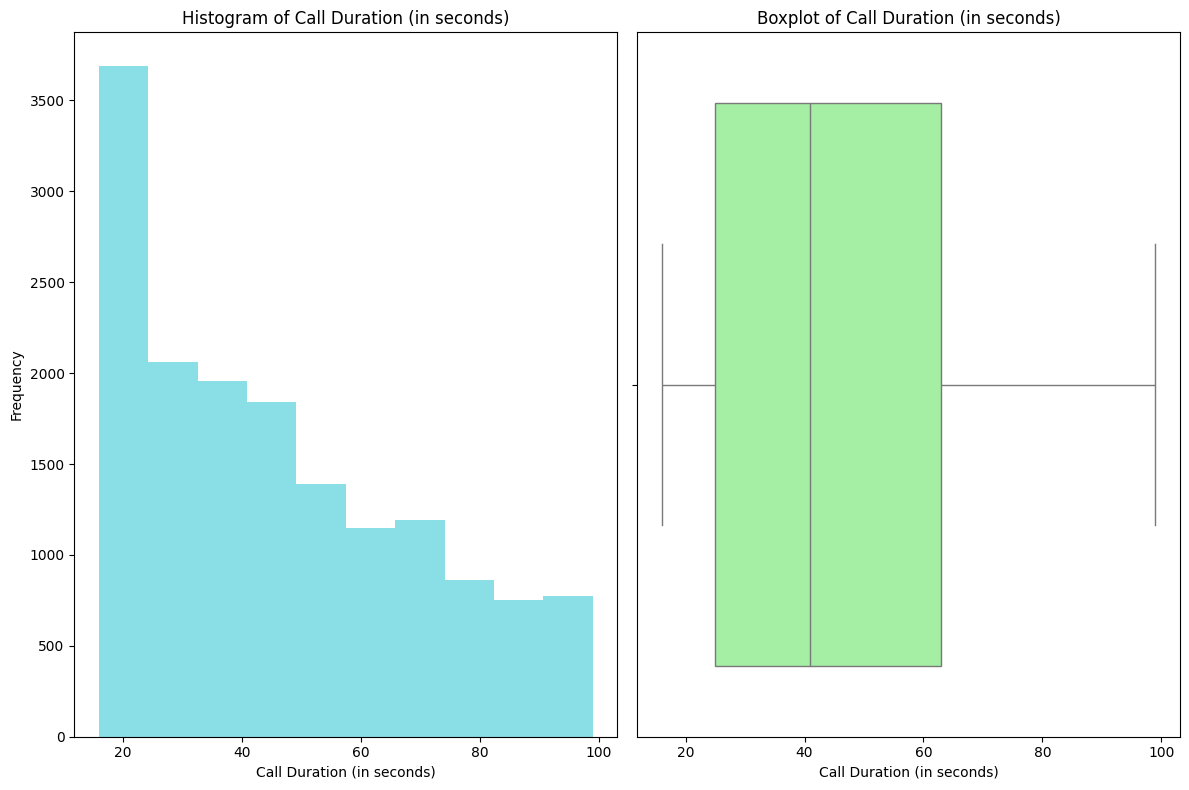

In [162]:
filtered_call = calls[(calls['Call Duration (in seconds)'] > 15) & (calls['Call Duration (in seconds)'] < 100)]

plt.subplot(1, 2, 1)
filtered_call['Call Duration (in seconds)'].hist(grid=False, figsize=(12, 8), color='#17becf', alpha=0.5)
plt.title('Histogram of Call Duration (in seconds)')
plt.xlabel('Call Duration (in seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_call['Call Duration (in seconds)'], color='palegreen')
plt.title('Boxplot of Call Duration (in seconds)')

plt.tight_layout()
plt.show()

In [163]:
# Filtering the data
filtered_call = calls[(calls['Call Duration (in seconds)'] > 15)]  # & (calls['Call Duration (in seconds)'] < 100)]

# Creating a histogram figure
fig = go.Figure()

# Adding the histogram
fig.add_trace(go.Histogram(
    x=filtered_call['Call Duration (in seconds)'],
    name='Call Duration',
    marker_color='#17becf',
    opacity=0.5
))

# Configuring the axes and title for the histogram
fig.update_layout(
    title='Histogram of Call Duration (in seconds)',
    xaxis_title='Call Duration (in seconds)',
    yaxis_title='Frequency',
    barmode='overlay'
)

# Displaying the histogram
fig.show()

# Creating a boxplot
fig_box = px.box(filtered_call, y='Call Duration (in seconds)',
                 title='Boxplot of Call Duration (in seconds)',
                 color_discrete_sequence=['palegreen'])

# Displaying the boxplot
fig_box.show()

From this graph, it is evident that our data contains outliers in call duration. The longest call lasted over two hours. Therefore, for better visualization, it was decided to exclude large outliers and set the maximum call duration to around 2500 seconds.

In [164]:
# Filtering data
filtered_call = calls[(calls['Call Duration (in seconds)'] > 15) & (calls['Call Duration (in seconds)'] < 2500)]

# Creating a figure for the histogram
fig = go.Figure()

# Adding the histogram
fig.add_trace(go.Histogram(
    x=filtered_call['Call Duration (in seconds)'],
    name='Call Duration',
    marker_color='#17becf',
    opacity=0.5
))

# Configuring the axes and title for the histogram
fig.update_layout(
    title='Histogram of Call Duration (in seconds)',
    xaxis_title='Call Duration (in seconds)',
    yaxis_title='Frequency',
    barmode='overlay'
)

# Displaying the histogram
fig.show()

# Creating a boxplot
fig_box = px.box(filtered_call, y='Call Duration (in seconds)',
                 title='Boxplot of Call Duration (in seconds)',
                 color_discrete_sequence=['palegreen'])

# Displaying the boxplot
fig_box.show()

It is observed that the majority of calls fall within the range of 15 to 500 seconds.  
All calls under 15 seconds were excluded as they were considered unsuccessful.

## Analysis of the time distribution between **deal creation and closing**

In [165]:
# Calculating the time from deal creation to closing
deals['Creation to Closing Duration'] = abs((deals['Closing Date'] - deals['Created Time']).dt.days)

# Filtering data to remove NaN values
creation_to_closing_duration = deals['Creation to Closing Duration'].dropna()

# Creating a histogram with an overlaid density curve
fig = px.histogram(creation_to_closing_duration,
                   x='Creation to Closing Duration',
                   nbins=20,
                   title='Distribution of Time from Creation to Closing of Deals',
                   color_discrete_sequence=["#17becf"],
                   marginal='rug')  # Adds marginal plots for distribution visualization

# Adding the density curve
fig.add_trace(go.Histogram(
    x=creation_to_closing_duration,
    histnorm='probability density',  # Normalization for density
    opacity=0.5,
    name='KDE',
    marker_color='rgba(23, 190, 207, 0.5)',  # Semi-transparent color
    showlegend=False
))

# Updating axes
fig.update_layout(
    xaxis_title='Days from Creation to Closing',
    yaxis_title='Frequency',
)

# Displaying the chart
fig.show()

The above graph shows the distribution of deal closing durations, with most deals closing within 19 days.

The next graph focuses specifically on successfully closed deals.

In [166]:
# Filtering deals where Initial Amount Paid is greater than 0
filtered_deals = deals[deals['Initial Amount Paid'] > 0]

# Calculating the time from deal creation to closing
filtered_deals['Creation to Closing Duration'] = abs((filtered_deals['Closing Date'] - filtered_deals['Created Time']).dt.days)

# Filtering data to remove NaN values
creation_to_closing_duration = filtered_deals['Creation to Closing Duration'].dropna()

# Creating a histogram with an overlaid density curve
fig = px.histogram(creation_to_closing_duration,
                   x='Creation to Closing Duration',
                   nbins=20,
                   title='Distribution of Time from Creation to Closing of Deals',
                   color_discrete_sequence=["#17becf"],
                   marginal='rug')  # Adds marginal plots for distribution visualization

# Adding the density curve
fig.add_trace(go.Histogram(
    x=creation_to_closing_duration,
    histnorm='probability density',  # Normalization for density
    opacity=0.5,
    name='KDE',
    marker_color='rgba(23, 190, 207, 0.5)',  # Semi-transparent color
    showlegend=False
))

# Updating axes
fig.update_layout(
    xaxis_title='Days from Creation to Closing',
    yaxis_title='Frequency',
)

# Displaying the chart
fig.show()

As observed in the previous graph, most successful deals are closed within 19 days.

To draw more accurate conclusions about the school's performance, a more detailed analysis of the data is required. Let's start with analyzing the efficiency of companies.

# **2. Company Performance Analysis**

To begin with, it is necessary to check whether the number of unique contacts in the 'Deals' and 'Contacts' tables matches.

In [167]:
# Extracting unique clients from the "Deals" table
unique_clients = deals['Contact Name'].unique()
print('Number of clients in the "Deals" table:', len(unique_clients))
print()

unique_clients_contacts = contacts['Id'].unique()
print('Number of clients in the "Contacts" table:', len(unique_clients_contacts))

Number of clients in the "Deals" table: 18068

Number of clients in the "Contacts" table: 18548


Since the numbers differ, it would be reasonable to merge the data from the deals and contacts for further analysis.

## Merging Deals and Contacts **Data**

In [168]:
# Merging data from deals and contacts
deals_contacts = pd.merge(deals, contacts, left_on='Contact Name', right_on='Id', how='left')
deals_contacts.head(5)
deals_contacts.shape

(21564, 32)

The merged data allows us to analyze how many unique leads were generated by each marketing campaign. This can be useful for evaluating the effectiveness of various marketing strategies.

## **Number of Leads by Campaign**

In [169]:
# Counting leads by campaigns
leads_per_campaign = deals_contacts.groupby('Campaign')['Id_x'].nunique().reset_index()
leads_per_campaign.rename(columns={'Id': 'Leads Count'}, inplace=True)

# Renaming the column for clarity
leads_per_campaign.rename(columns={'Id_x': 'Leads Count'}, inplace=True)

# Sorting by the number of leads in descending order
leads_per_campaign = leads_per_campaign.sort_values(by='Leads Count', ascending=False)

## Visualization: Number of Leads by **Campaign**

In [170]:
# Creating a bar chart with Plotly
fig = go.Figure()

# Adding a vertical bar chart for the number of leads by campaign
fig.add_trace(go.Bar(
    x=leads_per_campaign['Campaign'],  # Campaign names
    y=leads_per_campaign['Leads Count'],  # Lead count
    marker_color='blue'  # Bar color
))

# Layout adjustments
fig.update_layout(
    title='Number of Leads by Marketing Campaigns',
    xaxis=dict(title='Campaign'),  # X-axis
    yaxis=dict(title='Number of Leads'),  # Y-axis
    updatemenus=[
        {
            'buttons': [
                {'label': 'Top 10', 'method': 'update', 'args': [{'x': [leads_per_campaign['Campaign'].head(10)],
                                                                   'y': [leads_per_campaign['Leads Count'].head(10)]},
                                                                  {'title': 'Top 10 Campaigns by Number of Leads'}]},
                {'label': 'Top 15', 'method': 'update', 'args': [{'x': [leads_per_campaign['Campaign'].head(15)],
                                                                   'y': [leads_per_campaign['Leads Count'].head(15)]},
                                                                  {'title': 'Top 15 Campaigns by Number of Leads'}]},
                {'label': 'Top 20', 'method': 'update', 'args': [{'x': [leads_per_campaign['Campaign'].head(20)],
                                                                   'y': [leads_per_campaign['Leads Count'].head(20)]},
                                                                  {'title': 'Top 20 Campaigns by Number of Leads'}]},
                {'label': 'All', 'method': 'update', 'args': [{'x': [leads_per_campaign['Campaign']],
                                                               'y': [leads_per_campaign['Leads Count']]},
                                                              {'title': 'All Campaigns by Number of Leads'}]},
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Displaying the chart
fig.show()

Campaign Efficiency Analysis: Total Deals, Conversion Rate, and Sales **Amount**

To evaluate the effectiveness of marketing campaigns based on the number of processed deals, conversion rate, and total sales, we can create a table including the following columns:

- Campaign: Marketing campaign name.
- Total Deals: Total number of deals.
- Successful Deals: Number of successful deals (status: "Payment Done").
- Offer Total Amount: Total amount offered for successful deals.
- Conversion Rate: Conversion rate.

In [171]:
# Calculating the number of unique processed deals for each campaign
campaign_deals = deals[deals['Campaign'] != 'Unknown'].groupby('Campaign', observed=True)['Id'].nunique().reset_index(name='Total Deals')

# Calculating the number of successful deals for each campaign
successful_campaign_deals = deals[(deals['Initial Amount Paid'] > 0) & (deals['Campaign'] != 'Unknown')].groupby('Campaign', observed=True)['Id'].nunique().reset_index(name='Successful Deals')

# Calculating the total sales amount for each campaign
total_sales_campaign = deals[(deals['Initial Amount Paid'] > 0) & (deals['Campaign'] != 'Unknown')].groupby('Campaign', observed=True)['Offer Total Amount'].sum().reset_index(name='Offer Total Amount')

# Merging the data
campaign_performance = pd.merge(campaign_deals, successful_campaign_deals, on='Campaign', how='left')
campaign_performance = pd.merge(campaign_performance, total_sales_campaign, on='Campaign', how='left')

# Filling NaN values and calculating the conversion rate
campaign_performance['Successful Deals'] = campaign_performance['Successful Deals'].fillna(0)
campaign_performance['Offer Total Amount'] = campaign_performance['Offer Total Amount'].fillna(0).round()
campaign_performance['Conversion Rate'] = campaign_performance['Successful Deals'] / campaign_performance['Total Deals'] * 100

# Sorting data by the number of successful deals
campaign_performance_sorted = campaign_performance.sort_values(by='Successful Deals', ascending=False)

# Renaming columns for clarity
campaign_performance_sorted.columns = ['Campaign', 'Total Deals', 'Successful Deals', 'Offer Total Amount', 'Conversion Rate']

# Formatting column values and displaying the table
formatted_campaign_performance_sorted = campaign_performance_sorted.style.format({
    'Total Deals': '{:,.0f}',
    'Successful Deals': '{:,.0f}',
    'Offer Total Amount': '{:,.0f}',
    'Conversion Rate': '{:.2f}%'
}).hide(axis='index')

display(formatted_campaign_performance_sorted)

Campaign,Total Deals,Successful Deals,Offer Total Amount,Conversion Rate
unknown,"5,524",913,"7,975,301",16.53%
performancemax_digitalmarkt_ru_DE,"2,650",373,"3,331,600",14.08%
12.07.2023wide_DE,"1,574",226,"2,047,900",14.36%
youtube_shorts_DE,"1,635",219,"2,000,200",13.39%
02.07.23wide_DE,972,183,"1,638,600",18.83%
12.09.23interests_Uxui_DE,530,131,"1,218,300",24.72%
Dis_DE,580,130,"1,228,800",22.41%
04.07.23recentlymoved_DE,744,125,"1,127,100",16.80%
03.07.23women,609,116,"1,158,698",19.05%
07.07.23LAL_DE,540,112,"1,056,500",20.74%


## Visualization: Campaigns by Successful **Deals**

In [172]:
# Preparing data for visualization
deals_positive = deals[deals['Initial Amount Paid'] > 0]
successful_leads_per_campaign = deals_positive.groupby('Campaign')['Id'].nunique().reset_index()
successful_leads_per_campaign.rename(columns={'Id': 'Successful Leads Count'}, inplace=True)
successful_leads_per_campaign = successful_leads_per_campaign.sort_values(by='Successful Leads Count', ascending=False)

# Creating a dropdown menu for various campaign group levels
dropdown_options = []

for top_n in [5, 10, 15, 20, 25, 30, 35, 40, 45]:
    top_data = successful_leads_per_campaign.head(top_n)
    dropdown_options.append(
        dict(
            label=f'Top {top_n}',
            method="update",
            args=[{
                "x": [top_data['Campaign']],
                "y": [top_data['Successful Leads Count']],
                "marker": {"color": top_data['Successful Leads Count'], "colorscale": "Viridis"}
            },
            {"title": f"Top-{top_n} Campaigns by Successful Deals"}]
        )
    )

# Adding an option for all campaigns
dropdown_options.append(
    dict(
        label="All Campaigns",
        method="update",
        args=[{
            "x": [successful_leads_per_campaign['Campaign']],
            "y": [successful_leads_per_campaign['Successful Leads Count']],
            "marker": {"color": successful_leads_per_campaign['Successful Leads Count'], "colorscale": "Viridis"}
        },
        {"title": "All Campaigns by Successful Deals"}]
    )
)

# Base chart with top-10 campaigns by default
fig = go.Figure(data=[
    go.Bar(
        x=successful_leads_per_campaign['Campaign'].head(10),
        y=successful_leads_per_campaign['Successful Leads Count'].head(10),
        marker=dict(color=successful_leads_per_campaign['Successful Leads Count'].head(10), colorscale="Viridis")
    )
])

# Adding dropdown options for campaign selection
fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_options,
            direction="down",
            showactive=True,
            x=0.17,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

fig.show()

Analysis of Advertising **Campaigns**

The campaign "performancemax_digitalmarkt_ru_DE" has the highest number of deals (2,650) and one of the higher conversion rates (14.1%). The campaigns "12.09.23interests_Uxui_DE" and "Dis_DE" have the highest conversion rates (24.7% and 22.4%, respectively) but a relatively low number of successful deals.

This indicates that, in our case, a higher number of deals contributes to successful outcomes. Therefore, the first campaign should focus on improving the conversion rate where there is a higher deal flow.

In [173]:
# Count of leads by quality
deals_contacts['Quality'].value_counts()

,count
Quality,
E - Non Qualified,7633
D - Non Target,6248
C - Low,3442
B - Medium,1556
A - High,429
F,3


In [174]:
# Merging data on leads and successful deals
campaign_performance = pd.merge(leads_per_campaign, successful_leads_per_campaign, on='Campaign', how='left')
campaign_performance.fillna(0, inplace=True)

In [175]:
# Conversion rate calculation
campaign_performance['Conversion Rate'] = (campaign_performance['Successful Leads Count'] / campaign_performance['Leads Count']) * 100

# Display results
display(campaign_performance)

,Campaign,Leads Count,Successful Leads Count,Conversion Rate
0,unknown,5524,913.0,16.527878
1,performancemax_digitalmarkt_ru_DE,2650,373.0,14.075472
2,youtube_shorts_DE,1635,219.0,13.394495
3,12.07.2023wide_DE,1574,226.0,14.358323
4,02.07.23wide_DE,972,183.0,18.827160
...,...,...,...,...
150,Bolgspeak_DE,1,1.0,100.000000
151,eha_DE,1,0.0,0.000000
152,domain,1,1.0,100.000000
153,comp_search_DE,1,0.0,0.000000


In [176]:
# Define high-quality leads
quality_leads = deals_contacts[deals_contacts['Quality'] == 'A - High']

In [177]:
# Count of high-quality leads by source
quality_leads_per_source = quality_leads.groupby('Source')['Id_x'].nunique().reset_index()
quality_leads_per_source.rename(columns={'Id': 'Quality Leads Count'}, inplace=True)

# Display results
print(quality_leads_per_source)

            Source  Id_x
0         Bloggers    22
1              CRM    10
2     Facebook Ads   108
3       Google Ads    92
4          Organic    66
5              SMM    38
6   Telegram posts    16
7             Test     2
8       Tiktok Ads    33
9          Webinar    15
10     Youtube Ads    27


In [178]:
# Preparing data for high-quality leads
quality_leads = deals_contacts[deals_contacts['Quality'] == 'A - High']

# Counting high-quality leads by source
quality_leads_per_source = quality_leads.groupby('Source')['Id_x'].nunique().reset_index()
quality_leads_per_source.rename(columns={'Id_x': 'Quality Leads Count'}, inplace=True)

# Preparing data for the pie chart
quality_distribution = deals_contacts.groupby('Quality')['Id_x'].nunique().reset_index()
quality_distribution.rename(columns={'Id_x': 'Leads Count'}, inplace=True)

# Total number of leads
total_leads = quality_distribution['Leads Count'].sum()

# Creating a pie chart
fig_pie = px.pie(
    quality_distribution,
    names='Quality',
    values='Leads Count',
    title='Lead Quality Distribution',
    hole=0.3,  # Donut chart
    labels={'Leads Count': 'Number of Leads'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adding total leads in the center of the chart
fig_pie.add_annotation(
    text=f"{total_leads}",  # Centering the text
    font_size=20,
    showarrow=False,
    x=0.5,  # Horizontal center
    y=0.5,  # Vertical center
    xref='paper',
    yref='paper'
)

# Adjusting pie chart labels
fig_pie.update_traces(textinfo='label+percent+value')

# Highlighting the "A - High" segment in color
fig_pie.update_traces(marker=dict(line=dict(color='#000000', width=2)))  # Border
fig_pie.update_traces(selector=dict(name='A - High'), marker_color='red')  # Red for "High"

# Display the pie chart
fig_pie.show()

# Visualizing the number of high-quality leads by source
fig_sources = px.bar(
    quality_leads_per_source,
    x='Source',
    y='Quality Leads Count',
    title='Number of High-Quality Leads by Source',
    labels={'Quality Leads Count': 'Number of High-Quality Leads'}
)

# Adding numerical values on bars
fig_sources.update_traces(text=quality_leads_per_source['Quality Leads Count'], textposition='outside')

# Display the bar chart
fig_sources.show()

 Percentage of high-quality leads ("A - High") from the total
 The main source is "Facebook Ads," followed by "Google Ads" and "Organic"

## 3. Analysis of Sales Department **Efficiency**

To assess team performance, we first calculate the number of processed deals.

In [179]:
# Number of processed deals by each owner
deals_per_owner = deals.groupby('Deal Owner Name')['Id'].nunique().reset_index()
deals_per_owner.rename(columns={'Id': 'Total Deals'}, inplace=True)

# Display results for verification
print(deals_per_owner)

    Deal Owner Name  Total Deals
0     Alice Johnson           25
1         Amy Green           66
2          Ben Hall         1345
3         Bob Brown          337
4      Cara Iverson         1056
5     Charlie Davis         2963
6       Diana Evans         1013
7          Eva Kent          459
8       George King           94
9        Ian Miller          497
10       Jane Smith          988
11         John Doe           20
12     Julia Nelson         2241
13     Kevin Parker          574
14    Mason Roberts          268
15       Nina Scott         1283
16    Oliver Taylor          163
17  Paula Underwood         1861
18   Quincy Vincent         1884
19     Rachel White          871
20        Sam Young           67
21    Ulysses Adams         2165
22    Victor Barnes         1232
23      Wendy Clark            2
24      Xander Dean            3
25     Yara Edwards           85
26   Zachary Foster            1


In [180]:
# Visualization of the number of deals by owner
fig_deals_per_owner = px.bar(
    deals_per_owner,
    x='Deal Owner Name',
    y='Total Deals',
    title='Number of Processed Deals by Owners',
    labels={'Total Deals': 'Total Deals'},
    color='Total Deals',  # Color by deal count
    height=400
)

fig_deals_per_owner.show()

The graph shows that the leader in processing deals is Charlie Davis, followed by Julia Nelson and Ulysses Adams. Slightly behind them are Paula Underwood and Quincy Vincent.

Next, we analyze how processed and successful (paid) deals are distributed among owners.

In [181]:
# Number of processed deals by each owner
deals_per_owner = deals.groupby('Deal Owner Name')['Id'].nunique().reset_index()
deals_per_owner.rename(columns={'Id': 'Total Deals'}, inplace=True)

# Number of successfully closed deals by each owner
successful_deals_per_owner = deals[deals['Initial Amount Paid'] > 0].groupby('Deal Owner Name')['Id'].nunique().reset_index()
successful_deals_per_owner.rename(columns={'Id': 'Successful Deals'}, inplace=True)

# Merge data
merged_deals = pd.merge(deals_per_owner, successful_deals_per_owner, on='Deal Owner Name', how='outer').fillna(0)

# Swap column values
merged_deals[['Total Deals', 'Successful Deals']] = merged_deals[['Successful Deals', 'Total Deals']].values

# Create chart with 'YlOrBr' palette
fig = go.Figure(data=[
    go.Bar(name='Successful Deals', x=merged_deals['Deal Owner Name'], y=merged_deals['Total Deals'],
           marker_color=px.colors.sequential.YlOrBr[3],
           text=merged_deals['Total Deals'], textposition='inside'),
    go.Bar(name='Total Deals', x=merged_deals['Deal Owner Name'], y=merged_deals['Successful Deals'],
           marker_color=px.colors.sequential.YlOrBr[6],
           text=merged_deals['Successful Deals'], textposition='inside')
])

# Adjust chart layout
fig.update_layout(
    barmode='stack',
    title='Number of Processed and Successfully Closed Deals by Owners',
    xaxis_title='Deal Owner',
    yaxis_title='Number of Deals'
)

fig.show()

Total Sales by Each Owner

In [182]:
# Total sales amount by each owner
total_sales_per_owner = deals[deals['Initial Amount Paid'] > 0].groupby('Deal Owner Name')['Offer Total Amount'].sum().reset_index()
total_sales_per_owner.rename(columns={'Offer Total Amount': 'Total Sales'}, inplace=True)

# Initial sales amount by each owner
initial_sales_per_owner = deals[deals['Initial Amount Paid'] > 0].groupby('Deal Owner Name')['Initial Amount Paid'].sum().reset_index()
initial_sales_per_owner.rename(columns={'Initial Amount Paid': 'Initial Sales'}, inplace=True)

# Merge sales data
merged_sales = pd.merge(total_sales_per_owner, initial_sales_per_owner, on='Deal Owner Name', how='outer').fillna(0)

# Display results for verification
print(merged_sales)

# Create chart with 'Plasma' palette
fig = go.Figure(data=[
    go.Bar(name='Total Sales', x=merged_sales['Deal Owner Name'], y=merged_sales['Total Sales'],
           marker_color=px.colors.sequential.Plasma[0]),
    go.Bar(name='Initial Sales', x=merged_sales['Deal Owner Name'], y=merged_sales['Initial Sales'],
           marker_color=px.colors.sequential.Plasma[3])
])

# Adjust chart layout
fig.update_layout(
    barmode='group',
    title='Total and Initial Sales by Owners',
    xaxis_title='Deal Owner',
    yaxis_title='Sales Amount'
)

fig.show()

    Deal Owner Name  Total Sales  Initial Sales
0          Ben Hall    1985800.0       241700.0
1         Bob Brown       7500.0          950.0
2      Cara Iverson     912000.0       688400.0
3     Charlie Davis    3819000.0       445600.0
4       Diana Evans     554500.0        50450.0
5          Eva Kent     554300.0        65200.0
6       George King      32000.0         2900.0
7        Ian Miller     299000.0        33050.0
8        Jane Smith    1468500.0       140050.0
9          John Doe       7500.0         3600.0
10     Julia Nelson    3575311.0       382961.0
11     Kevin Parker     741400.0        72850.0
12    Mason Roberts     210500.0        19300.0
13       Nina Scott    1942900.0       206150.0
14    Oliver Taylor    1660500.0       152650.0
15  Paula Underwood    2835000.0       326750.0
16   Quincy Vincent    1778000.0       221601.0
17     Rachel White      44500.0        14000.0
18    Ulysses Adams    5028400.0       540050.0
19    Victor Barnes    2191300.0       3

Distribution of Total Sales by Owners

In [183]:
# Total sales amount by each owner
total_sales_per_owner = deals[deals['Initial Amount Paid'] > 0].groupby('Deal Owner Name')['Offer Total Amount'].sum().reset_index()
total_sales_per_owner.rename(columns={'Offer Total Amount': 'Total Sales'}, inplace=True)

# Calculate total sales
total_sales = total_sales_per_owner['Total Sales'].sum()

# Calculate percentage contribution
total_sales_per_owner['Percentage'] = (total_sales_per_owner['Total Sales'] / total_sales) * 100

# Create treemap
fig = px.treemap(
    total_sales_per_owner,
    path=['Deal Owner Name'],
    values='Total Sales',
    title='Total Sales Distribution by Owners'
)

# Adjust chart appearance
fig.update_traces(root_color="lightgrey")
fig.for_each_trace(lambda t: t.update(
    text=total_sales_per_owner['Deal Owner Name'] + '<br>' +
         total_sales_per_owner['Total Sales'].astype(str) + ' (' +
         total_sales_per_owner['Percentage'].round(1).astype(str) + '%)',
    textinfo='text'
))

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig.show()

Owner Performance Analysis

In [184]:
# Merge data
owner_performance = pd.merge(deals_per_owner, successful_deals_per_owner, on='Deal Owner Name', how='left')
owner_performance.fillna(0, inplace=True)

# Merge with sales data
owner_performance = pd.merge(owner_performance, merged_sales, on='Deal Owner Name', how='left')

# Calculate conversion rate
owner_performance['Conversion Rate'] = ((owner_performance['Successful Deals'] / owner_performance['Total Deals']) * 100).round(1)

# Create combined chart
fig = go.Figure()

# Add bar charts for total and initial sales
fig.add_trace(go.Bar(
    name='Total Sales',
    x=owner_performance['Deal Owner Name'],
    y=owner_performance['Total Sales'],
    marker_color=px.colors.sequential.Plasma[0],
    opacity=0.6
))

fig.add_trace(go.Bar(
    name='Initial Sales',
    x=owner_performance['Deal Owner Name'],
    y=owner_performance['Initial Sales'],
    marker_color=px.colors.sequential.Plasma[3],
    opacity=0.6
))

# Add conversion rate line on secondary Y-axis
fig.add_trace(go.Scatter(
    x=owner_performance['Deal Owner Name'],
    y=owner_performance['Conversion Rate'],
    name='Conversion Rate (%)',
    mode='lines+markers',
    marker=dict(color='red', size=10),
    line=dict(width=2),
    yaxis='y2'
))

# Adjust chart layout
fig.update_layout(
    title='Total Sales and Conversion Rate by Owners',
    xaxis_title='Deal Owner',
    yaxis_title='Sales Amount',
    yaxis2=dict(title='Conversion Rate (%)', overlaying='y', side='right', showgrid=False),
    barmode='overlay',
    legend=dict(
        x=0.6, y=1.09, orientation='h', font=dict(size=12),
        itemclick='toggleothers', itemdoubleclick='toggle'
    ),
    margin=dict(t=80, l=25, r=35, b=30)
)

fig.show()

Analyzing deal processing performance in monetary terms, Ulysses Adams emerges as the top performer, followed by Charlie Davis. However, when considering performance in relation to conversion rates, it becomes evident that Oliver Taylor, despite being in the middle of the ranking in terms of revenue, is the most efficient employee. He doesn’t process a large number of deals, but 93.9% of them are successfully closed.

Additionally, there is a group of employees who do not process or close any deals.

Therefore, it is worth examining what other responsibilities these employees have at the school to determine their future status.

## Advertising Campaign Performance **Analysis**

Now we will conduct a similar analysis for campaigns to evaluate their contribution to total sales and conversion rates.

In [185]:
# Number of processed deals per campaign
deals_per_campaign = deals.groupby('Campaign')['Id'].nunique().reset_index()
deals_per_campaign.rename(columns={'Id': 'Total Deals'}, inplace=True)

In [186]:
# Number of successful deals per campaign
successful_deals_per_campaign = deals[deals['Initial Amount Paid'] > 0].groupby('Campaign')['Id'].nunique().reset_index()
successful_deals_per_campaign.rename(columns={'Id': 'Successful Deals'}, inplace=True)

In [187]:
# Total sales per campaign
total_sales_per_campaign = deals[deals['Initial Amount Paid'] > 0].groupby('Campaign')['Offer Total Amount'].sum().reset_index()
total_sales_per_campaign.rename(columns={'Offer Total Amount': 'Total Sales'}, inplace=True)

In [188]:
# Merging data
campaign_performance = pd.merge(deals_per_campaign, successful_deals_per_campaign, on='Campaign', how='left')
campaign_performance = pd.merge(campaign_performance, total_sales_per_campaign, on='Campaign', how='left')
campaign_performance.fillna(0, inplace=True)

In [189]:
# Calculating conversion rate
campaign_performance['Conversion Rate'] = (campaign_performance['Successful Deals'] / campaign_performance['Total Deals']) * 100

# Displaying results
display(campaign_performance)

,Campaign,Total Deals,Successful Deals,Total Sales,Conversion Rate
0,01.04.23women_PL,31,0.0,0.0,0.000000
1,02.05.24test_DE,121,7.0,77000.0,5.785124
2,02.07.23wide_DE,972,183.0,1638600.0,18.827160
3,02.08.23interests_DE,8,0.0,0.0,0.000000
4,03.07.23women,609,116.0,1158698.0,19.047619
...,...,...,...,...,...
150,work_wr,6,0.0,0.0,0.000000
151,workingin_DE,48,4.0,42000.0,8.333333
152,yo_DE,13,1.0,11500.0,7.692308
153,youtube_shorts_DE,1635,219.0,2000200.0,13.394495


In [190]:
# Calculating conversion rate
campaign_performance['Conversion Rate'] = (campaign_performance['Successful Deals'] / campaign_performance['Total Deals']) * 100

# Sorting by conversion rate in descending order
campaign_performance_sorted = campaign_performance.sort_values(by='Conversion Rate', ascending=False)

# Displaying the first 50 rows of sorted results
display(campaign_performance_sorted.head(50))

,Campaign,Total Deals,Successful Deals,Total Sales,Conversion Rate
58,Bolgspeak_DE,1,1.0,11000.0,100.000000
142,web2410_DE,1,1.0,11500.0,100.000000
101,hanna,1,1.0,11000.0,100.000000
90,domain,1,1.0,5000.0,100.000000
115,nina,1,1.0,11000.0,100.000000
138,web1312_DE,11,6.0,66500.0,54.545455
37,2005_Lost_DE,6,3.0,33000.0,50.000000
98,ggg10_DE,2,1.0,11000.0,50.000000
110,mail_DE,2,1.0,11000.0,50.000000
124,podslush_DE,10,5.0,47400.0,50.000000


In [191]:
# Sorting data by Total Sales in descending order
sorted_campaigns = campaign_performance.sort_values(by='Total Sales', ascending=False)

# Horizontal bar chart of advertising campaign performance with increased size and sorting top-to-bottom
fig_campaigns = px.bar(
    sorted_campaigns,  # Using sorted data
    x='Total Sales',
    y='Campaign',
    color='Conversion Rate',
    orientation='h',
    title='Advertising Campaign Performance (Sorted by Total Sales)',
    labels={'Total Sales': 'Total Sales', 'Conversion Rate': 'Conversion Rate'},
    height=800,  # Increased chart height
    width=1200,  # Increased chart width
    category_orders={"Campaign": sorted_campaigns['Campaign'].tolist()}  # Specifying category order
)

fig_campaigns.show()

In [192]:
top_20_campaigns['Campaign'].unique()

array(['unknown', 'performancemax_digitalmarkt_ru_DE',
       '12.07.2023wide_DE', 'youtube_shorts_DE', '02.07.23wide_DE',
       'Dis_DE', '12.09.23interests_Uxui_DE', '03.07.23women',
       '04.07.23recentlymoved_DE', '07.07.23LAL_DE',
       '24.09.23retargeting_DE', 'work_DE', 'BloggerShina_DE',
       'brand_search_eng_DE', 'blog2_DE', 'ASA_de_DE', '15.07.23b_DE',
       'mu_DE', '18.10.23wide_gos_DE', 'discovery_DE'], dtype=object)

Displaying the first 20 campaigns ranked by total sales from successful deals

In [193]:
# Sorting data by Total Sales in descending order and limiting to the top 20
top_20_campaigns = campaign_performance.sort_values(by='Total Sales', ascending=False).head(20)

# Horizontal bar chart for the top-20 advertising campaigns
fig_campaigns = px.bar(
    top_20_campaigns,  # Using sorted data limited to 20 records
    x='Total Sales',
    y='Campaign',
    color='Conversion Rate',
    orientation='h',
    title='Top-20 Advertising Campaign Performance',
    labels={'Total Sales': 'Total Sales', 'Conversion Rate': 'Conversion Rate'},
    height=800,  # Increased chart height
    width=1200,  # Increased chart width
    category_orders={"Campaign": top_20_campaigns['Campaign'].tolist()}  # Specifying category order
)

fig_campaigns.show()

According to the displayed Top-20, it is clear that performancemax_digitalmarkt_ru_DE generates the highest revenue for the school. However, the conversion rate is only 14%. On the other hand, brand_search_eng_DE had a relatively low total sales amount, but its conversion rate was 34.5%.

# **4. Payment and Product Analysis**

For the analysis of payments and products in the context of deal success, we will use the following metrics and steps:

- Distribution of payment types and their influence on deal success.
- Popularity of products and their success rate (deal closure).
- Types of training and their correlation with deal success.

**Analysis of Payment Types and Their Influence on Deal Success**

We will analyze which payment types are most commonly associated with successful deals.

This will give insight into the preferred payment methods of clients who successfully close deals.

In [194]:
# Distribution of payment types across all deals
payment_distribution = deals['Payment Type'].value_counts().reset_index()
payment_distribution.columns = ['Payment Type', 'Count']

In [195]:
# Distribution of payment types across successful deals (e.g., Stage = 'Closed Won')
successful_deals = deals[deals['Initial Amount Paid'] > 0]
successful_payment_distribution = successful_deals['Payment Type'].value_counts().reset_index()
successful_payment_distribution.columns = ['Payment Type', 'Successful Deals']

In [196]:
# Merging payment type distribution data for all deals and successful deals
payment_analysis = pd.merge(payment_distribution, successful_payment_distribution, on='Payment Type', how='left')
payment_analysis.fillna(0, inplace=True)

In [197]:
# Calculating success rate for each payment type
payment_analysis['Success Rate (%)'] = (payment_analysis['Successful Deals'] / payment_analysis['Count']) * 100

# Printing results
print(payment_analysis)

         Payment Type  Count  Successful Deals  Success Rate (%)
0  Recurring Payments    350               347         99.142857
1         One Payment    140               136         97.142857
2         Reservation      5                 5        100.000000


**Analysis of Popularity and Success of Different Products**

Here, we will examine which products are the most popular and which ones are most likely to result in a successful deal.

In [198]:
# Distribution of deals by product
product_distribution = deals['Product'].value_counts().reset_index()
product_distribution.columns = ['Product', 'Total Deals']

In [199]:
# Distribution of successful deals by product
successful_product_distribution = successful_deals['Product'].value_counts().reset_index()
successful_product_distribution.columns = ['Product', 'Successful Deals']

In [200]:
# Merging data on all deals and successful deals by product
product_analysis = pd.merge(product_distribution, successful_product_distribution, on='Product', how='left')
product_analysis.fillna(0, inplace=True)

In [201]:
# Calculating success rate for each product
product_analysis['Success Rate (%)'] = (product_analysis['Successful Deals'] / product_analysis['Total Deals']) * 100

# Printing results
display(product_analysis)

,Product,Total Deals,Successful Deals,Success Rate (%)
0,unknown,17972,10.0,0.055642
1,Digital Marketing,1990,1820.0,91.457286
2,UX/UI Design,1022,929.0,90.900196
3,Web Developer,575,528.0,91.826087
4,Find yourself in IT,4,2.0,50.000000
5,Data Analytics,1,0.0,0.000000


**Analysis of Training Types and Their Success Rate**

Now, we will analyze the types of training and their correlation with deal success.

In [202]:
# Distribution of deals by training type
education_type_distribution = deals['Education Type'].value_counts().reset_index()
education_type_distribution.columns = ['Education Type', 'Total Deals']

In [203]:
# Distribution of successful deals by training type
successful_education_type_distribution = successful_deals['Education Type'].value_counts().reset_index()
successful_education_type_distribution.columns = ['Education Type', 'Successful Deals']

In [204]:
# Merging data on all deals and successful deals by training type
education_type_analysis = pd.merge(education_type_distribution, successful_education_type_distribution, on='Education Type', how='left')
education_type_analysis.fillna(0, inplace=True)

In [205]:
# Calculating success rate for each training type
education_type_analysis['Success Rate (%)'] = (education_type_analysis['Successful Deals'] / education_type_analysis['Total Deals']) * 100

# Printing results
print(education_type_analysis)

  Education Type  Total Deals  Successful Deals  Success Rate (%)
0        unknown        18265               145          0.793868
1        Morning         2895              2808         96.994819
2        Evening          404               336         83.168317


In [206]:
education_type_analysis['Education Type']

,Education Type
0,unknown
1,Morning
2,Evening


In [207]:
# Visualizing the payment type analysis
fig_payment = go.Figure()

# Bar chart
fig_payment.add_trace(go.Bar(
    x=payment_analysis['Payment Type'],
    y=payment_analysis['Count'],
    name='Number of Deals',
    text=payment_analysis['Count'],
    textposition='outside',
    marker_color='skyblue'
))

# Success rate line
fig_payment.add_trace(go.Scatter(
    x=payment_analysis['Payment Type'],
    y=payment_analysis['Success Rate (%)'],
    name='Success Rate (%)',
    yaxis='y2',  # Separate axis for success rate
    mode='lines+markers+text',
    text=payment_analysis['Success Rate (%)'].round(2),  # Rounded text values
    textposition='top center',  # Positioning text above points
    line=dict(color='red')
))

fig_payment.update_layout(
    title='Payment Type Distribution and Their Success Rate',
    xaxis_title='Payment Type',
    yaxis_title='Number of Deals',
    yaxis2=dict(
        title='Success Rate (%)',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1, orientation='h')
)
fig_payment.show()

# Visualizing the product analysis
fig_product = go.Figure()

# Bar chart
fig_product.add_trace(go.Bar(
    x=product_analysis['Product'],
    y=product_analysis['Total Deals'],
    name='Number of Deals',
    text=product_analysis['Total Deals'],
    textposition='outside',
    marker_color='lightgreen'
))

# Success rate line
fig_product.add_trace(go.Scatter(
    x=product_analysis['Product'],
    y=product_analysis['Success Rate (%)'],
    name='Success Rate (%)',
    yaxis='y2',  # Separate axis for success rate
    mode='lines+markers+text',
    text=product_analysis['Success Rate (%)'].round(2),  # Rounded text values
    textposition='top center',
    line=dict(color='red')
))

fig_product.update_layout(
    title='Product Popularity and Their Success Rate',
    xaxis_title='Product',
    yaxis_title='Number of Deals',
    yaxis2=dict(
        title='Success Rate (%)',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1, orientation='h')
)
fig_product.show()

# Visualizing the education type analysis
fig_education = go.Figure()

# Bar chart
fig_education.add_trace(go.Bar(
    x=education_type_analysis['Education Type'],
    y=education_type_analysis['Total Deals'],
    name='Number of Deals',
    text=education_type_analysis['Total Deals'],
    textposition='outside',
    marker_color='lightblue'
))

# Success rate line
fig_education.add_trace(go.Scatter(
    x=education_type_analysis['Education Type'],
    y=education_type_analysis['Success Rate (%)'],
    name='Success Rate (%)',
    yaxis='y2',  # Separate axis for success rate
    mode='lines+markers+text',
    text=education_type_analysis['Success Rate (%)'].round(2),  # Rounded text values
    textposition='top center',
    line=dict(color='red')
))

fig_education.update_layout(
    title='Training Type Popularity and Their Success Rate',
    xaxis_title='Training Type',
    yaxis_title='Number of Deals',
    yaxis2=dict(
        title='Success Rate (%)',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1, orientation='h')
)
fig_education.show()

## **1. Distribution of Payment Types and Their Success**

Looking at the distribution of payment types, it is clear that clients prefer to pay in installments, with one-time payments being significantly less frequent.

## **2. Popularity of Products and Their Success**

Digital Marketing is the most prioritized program, followed by UX/UI Design and Web Development. The conversion rate for these products is also quite high, around 91%-92%, and approximately at the same level.

## **3. Popularity of Education Types and Their Success**

The day form of education is preferred over the evening form. When looking at the conversion rate, it is evident that those who know how they want to study (e.g., Morning) are more likely to succeed (96.99%) compared to those who choose the Evening option (83.17%). Those who are undecided have a much lower conversion rate of only 0.79%.

In [208]:
# Filtering for successful deals
successful_deals = deals[deals['Initial Amount Paid'] > 0]

# Grouping and counting deals by education type and product
education_product_counts = (
    successful_deals
    .groupby(['Education Type', 'Product'])
    .size()
    .reset_index(name='Count')
)

# Calculating the total number of successful deals for the Sunburst center
total_successful_deals = education_product_counts['Count'].sum()

# Preparing data for the Sunburst chart
ids = ['Total']  # Center
labels = ['Total']
parents = ['']
values = [total_successful_deals]

# Adding 'Education Type' level
for edu_type in education_product_counts['Education Type'].unique():
    edu_count = education_product_counts[education_product_counts['Education Type'] == edu_type]['Count'].sum()
    ids.append(edu_type)
    labels.append(edu_type)
    parents.append('Total')
    values.append(edu_count)

    # Adding 'Product' level for each 'Education Type'
    for _, row in education_product_counts[education_product_counts['Education Type'] == edu_type].iterrows():
        ids.append(f"{edu_type} - {row['Product']}")
        labels.append(row['Product'])
        parents.append(edu_type)
        values.append(row['Count'])

# Creating the Sunburst chart with numeric and percentage values
fig = go.Figure(go.Sunburst(
    ids=ids,
    labels=labels,
    parents=parents,
    values=values,
    branchvalues='total',  # Use total values for branches
    textinfo='label+value+percent entry',  # Display label, value, and percentage
))

# Layout settings
fig.update_layout(
    title="Distribution of Successful Deals by Education Type and Products",
    margin=dict(t=50, l=0, r=0, b=0)
)

# Display the chart
fig.show()


The chart clearly shows that the day form of education dominates in the analyzed school, accounting for 85% of all successful deals. The most popular product is "Digital Marketing," both for the day and evening education forms, at 45% and 6% respectively.

In [209]:
# Filtering for successful deals
successful_deals = deals[deals['Initial Amount Paid'] > 0]

# Grouping and summing 'Initial Amount Paid'
education_product_initial = (
    successful_deals
    .groupby(['Education Type', 'Product'])['Initial Amount Paid']
    .sum()
    .reset_index(name='Total Initial Amount Paid')
)

# Grouping and summing 'Offer Total Amount'
education_product_offer = (
    successful_deals
    .groupby(['Education Type', 'Product'])['Offer Total Amount']
    .sum()
    .reset_index(name='Total Offer Amount')
)

# Calculating the total amount for the Sunburst center for both charts
total_initial_amount = education_product_initial['Total Initial Amount Paid'].sum()
total_offer_amount = education_product_offer['Total Offer Amount'].sum()

# Preparing data for the first chart - Initial Amount Paid
ids_initial = ['Total Initial']  # Center
labels_initial = ['Total Initial']
parents_initial = ['']
values_initial = [total_initial_amount]

# Adding 'Education Type' and 'Product' levels for the Initial Amount Paid chart
for edu_type in education_product_initial['Education Type'].unique():
    edu_initial_sum = education_product_initial[education_product_initial['Education Type'] == edu_type]['Total Initial Amount Paid'].sum()
    ids_initial.append(edu_type)
    labels_initial.append(edu_type)
    parents_initial.append('Total Initial')
    values_initial.append(edu_initial_sum)

    for _, row in education_product_initial[education_product_initial['Education Type'] == edu_type].iterrows():
        ids_initial.append(f"{edu_type} - {row['Product']}")
        labels_initial.append(row['Product'])
        parents_initial.append(edu_type)
        values_initial.append(row['Total Initial Amount Paid'])

# Preparing data for the second chart - Offer Total Amount
ids_offer = ['Total Offer']  # Center
labels_offer = ['Total Offer']
parents_offer = ['']
values_offer = [total_offer_amount]

# Adding 'Education Type' and 'Product' levels for the Offer Total Amount chart
for edu_type in education_product_offer['Education Type'].unique():
    edu_offer_sum = education_product_offer[education_product_offer['Education Type'] == edu_type]['Total Offer Amount'].sum()
    ids_offer.append(edu_type)
    labels_offer.append(edu_type)
    parents_offer.append('Total Offer')
    values_offer.append(edu_offer_sum)

    for _, row in education_product_offer[education_product_offer['Education Type'] == edu_type].iterrows():
        ids_offer.append(f"{edu_type} - {row['Product']}")
        labels_offer.append(row['Product'])
        parents_offer.append(edu_type)
        values_offer.append(row['Total Offer Amount'])

# Creating two Sunburst charts
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'sunburst'}, {'type': 'sunburst'}]],
                    subplot_titles=["Distribution by Initial Amount Paid", "Distribution by Offer Total Amount"])

# Adding the first Sunburst chart
fig.add_trace(go.Sunburst(
    ids=ids_initial,
    labels=labels_initial,
    parents=parents_initial,
    values=values_initial,
    branchvalues='total',
    textinfo='label+value+percent entry',  # Show labels, values, and percentages
    textfont=dict(size=12),  # Set text font size
    insidetextfont=dict(size=10, color="white")  # Inside text font
), row=1, col=1)

# Adding the second Sunburst chart
fig.add_trace(go.Sunburst(
    ids=ids_offer,
    labels=labels_offer,
    parents=parents_offer,
    values=values_offer,
    branchvalues='total',
    textinfo='label+value+percent entry',  # Show labels, values, and percentages
    textfont=dict(size=12),  # Set text font size
    insidetextfont=dict(size=10, color="white")  # Inside text font
), row=1, col=2)

# Layout settings
fig.update_layout(
    title="Comparison of Distributions by Initial Amount Paid and Offer Total Amount",
    margin=dict(t=50, l=0, r=0, b=0)
)

# Display the charts
fig.show()

A similar pattern is observed in the financial distribution. Although the percentage breakdown for the first payment and the total offer amount differs, the overall picture remains unchanged: the day form of education and the "Digital Marketing" product dominate.

For further analysis of the details regarding students, we need to consider the level of German language proficiency and its potential impact on the choice of the education program.

Let's start by analyzing the distribution of German language proficiency levels among all students.

In [210]:
# Filtering data based on the condition
deals_filtered = deals[deals['Initial Amount Paid'] > 0]

# Filtering data for successful deals
successful_deals = deals_filtered[deals_filtered['Level of Deutsch'].notnull()]

# Grouping by Level of Deutsch
level_of_deutsch_counts = successful_deals['Level of Deutsch'].value_counts().reset_index()
level_of_deutsch_counts.columns = ['Level of Deutsch', 'Count']

# Calculating the total count for the Sunburst center
total_count = level_of_deutsch_counts['Count'].sum()

# Creating data for the chart - Level of Deutsch
ids_deutsch = ['Total Deutsch']  # Center
labels_deutsch = ['Total Deutsch']
parents_deutsch = ['']
values_deutsch = [total_count]

# Adding the 'Level of Deutsch' level
for _, row in level_of_deutsch_counts.iterrows():
    ids_deutsch.append(row['Level of Deutsch'])
    labels_deutsch.append(row['Level of Deutsch'])
    parents_deutsch.append('Total Deutsch')
    values_deutsch.append(row['Count'])

# Creating Sunburst chart
fig = go.Figure(go.Sunburst(
    ids=ids_deutsch,
    labels=labels_deutsch,
    parents=parents_deutsch,
    values=values_deutsch,
    branchvalues='total',
    textinfo='label+value+percent entry',  # Displaying labels, values, and percentages for each segment
    textfont=dict(size=12),  # Setting font size
    insidetextfont=dict(size=10, color="white")  # Text settings inside the sector
))

# Layout settings
fig.update_layout(
    title="Distribution by Level of Deutsch",
    margin=dict(t=50, l=0, r=0, b=0)
)

# Displaying the chart
fig.show()

This chart demonstrates that the majority of students did not specify their level of German proficiency, which accounts for 64%. The rest of the students have an intermediate level (B1 and B2).

In [211]:
# Checking for necessary columns and filtering for successful deals
if {'Initial Amount Paid', 'Offer Total Amount', 'Education Type', 'Product', 'Level of Deutsch'}.issubset(deals.columns):

    # Filtering data for successful deals
    successful_deals = deals[deals['Initial Amount Paid'] > 0]

    # Counting students by 'Education Type' and 'Level of Deutsch'
    education_type_students = (
        successful_deals
        .groupby(['Education Type', 'Product', 'Level of Deutsch'])
        .size()
        .reset_index(name='Student Count')
    )

    # Calculating the total number of students for the Sunburst center
    total_students = education_type_students['Student Count'].sum()

    # Creating data for the first chart - distribution by products and language level
    ids_product = ['Total Students']  # Center
    labels_product = ['Total Students']
    parents_product = ['']
    values_product = [total_students]

    # Adding 'Product' and 'Level of Deutsch' level for the first chart
    for product in successful_deals['Product'].unique():
        product_students_sum = education_type_students[education_type_students['Product'] == product]['Student Count'].sum()
        ids_product.append(product)
        labels_product.append(product)
        parents_product.append('Total Students')
        values_product.append(product_students_sum)

        for _, row in education_type_students[education_type_students['Product'] == product].iterrows():
            ids_product.append(f"{product} - {row['Level of Deutsch']}")
            labels_product.append(row['Level of Deutsch'])
            parents_product.append(product)
            values_product.append(row['Student Count'])

    # Creating data for the second chart - distribution by education type and language levels
    ids_education_type = ['Total Students']  # Center
    labels_education_type = ['Total Students']
    parents_education_type = ['']
    values_education_type = [total_students]

    # Adding 'Education Type' and 'Level of Deutsch' level for the second chart
    for edu_type in education_type_students['Education Type'].unique():
        edu_type_students_sum = education_type_students[education_type_students['Education Type'] == edu_type]['Student Count'].sum()
        ids_education_type.append(edu_type)
        labels_education_type.append(edu_type)
        parents_education_type.append('Total Students')
        values_education_type.append(edu_type_students_sum)

        for _, row in education_type_students[education_type_students['Education Type'] == edu_type].iterrows():
            ids_education_type.append(f"{edu_type} - {row['Level of Deutsch']}")
            labels_education_type.append(row['Level of Deutsch'])
            parents_education_type.append(edu_type)
            values_education_type.append(row['Student Count'])

    # Creating two Sunburst charts
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'sunburst'}, {'type': 'sunburst'}]],
                        subplot_titles=["Distribution by products and language levels", "Distribution by education type and language levels"])

    # Adding the first Sunburst chart (by products and language levels)
    fig.add_trace(go.Sunburst(
        ids=ids_product,
        labels=labels_product,
        parents=parents_product,
        values=values_product,
        branchvalues='total',
        textinfo='label+value+percent entry',
        textfont=dict(size=12),
        insidetextfont=dict(size=10, color="white")
    ), row=1, col=1)

    # Adding the second Sunburst chart (by education type and language levels)
    fig.add_trace(go.Sunburst(
        ids=ids_education_type,
        labels=labels_education_type,
        parents=parents_education_type,
        values=values_education_type,
        branchvalues='total',
        textinfo='label+value+percent entry',
        textfont=dict(size=12),
        insidetextfont=dict(size=10, color="white")
    ), row=1, col=2)

    # Layout settings
    fig.update_layout(
        title="Comparison of distributions by products and language levels, as well as by education type and language levels",
        margin=dict(t=50, l=0, r=0, b=0)
    )

    # Displaying the charts
    fig.show()

else:
    print("Necessary columns are missing in the data.")

If we take students who have specified their level of German proficiency as a basis, we can conclude that most of them have an intermediate level (B1-B2). If we assume that the distribution for unknown values is similar, we can conclude that those starting their studies in school already possess an intermediate level of the language. This, in turn, increases the chances of successful employment in the future.

# **Geografische Datenanalyse**

In [212]:
import json
# with open("city_data_google.json", "w") as json_file:
#     json.dump(city_data, json_file, indent=4)
# with open("responses_google.json", "w") as json_file:
#     json.dump(responses, json_file, indent=4)
# Öffnen der Datei und Laden der Daten
with open("/content/city_data_google.json", "r") as json_file:
    city_data = json.load(json_file)

# print(dataa)

FileNotFoundError: [Errno 2] No such file or directory: '/content/city_data_google.json'

In [208]:
def get_city_info(city):
    info = city_data.get(city, {})
    return pd.Series({
        'longitude': info.get('longitude', None),
        'latitude': info.get('latitude', None),
        'country_ru': info.get('country', None),
        'city_ru': info.get('formatted_address', None)
    })
deals_df = deals
deals_df['City'] = deals_df['City'].fillna('Unnamed')
deals_df[['longitude', 'latitude', 'country_ru', 'city_ru']] = deals_df['City'].apply(get_city_info)

In [ ]:
deals_df.loc[deals_df.City != "Unnamed"].head()

In [ ]:
deals_df['Level of Deutsch'].unique()

In [ ]:
# replace_take_two = {'B1', 'A2', 'B2', 'C2', 'C1', 'A1', 'A0'}
# deals_df['Level of Deutsch'] = deals_df['Level of Deutsch'].replace(replace_take_two)

In [ ]:
deals_df['City'] = deals_df.City.replace('-', "Unnamed")

In [ ]:
geo_deals_df = deals_df[['Id', 'City']]
geo_deals_df_clean = geo_deals_df.dropna(subset=['City'])
deals_by_city = geo_deals_df_clean.groupby('City').size().reset_index(name='Number of Deals')

deals_by_city_sorted = deals_by_city.sort_values(by='Number of Deals', ascending=False)
deals_by_city_sorted

In [ ]:
mode_values = deals_df.groupby('Contact Name')['Level of Deutsch'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
deals_df['Level of Deutsch'] = deals_df['Contact Name'].map(mode_values)

In [ ]:
geo_data_deals = deals_df[["City", "longitude", "latitude", "country_ru",
                           "city_ru"]].drop_duplicates(subset=["City"]).dropna()

In [ ]:
deals_by_city_sorted = deals_by_city_sorted.merge(geo_data_deals, on='City', how="inner")
deals_by_city_sorted

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Anzahl der Deals', x=deals_by_city_sorted['City'].head(10), y=deals_by_city_sorted['Number of Deals'].head(10))
])

fig.update_layout(
    title="Top 10 Städte nach Anzahl der Deals",
    xaxis_title="Stadt",
    yaxis_title="Anzahl der Deals",
    xaxis_tickangle=-45
)
fig.show()

In [ ]:
fig = px.scatter_geo(deals_by_city_sorted,
                     lat='latitude',
                     lon='longitude',
                     size='Number of Deals',
                     hover_name='city_ru',
                     projection='natural earth',
                     title="Geografische Verteilung der Deals nach Stadt")
fig.show()